In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [42]:
zip_code_df = pd.read_csv('ny_rent_prediction_data_comprehensive.csv')

In [43]:
zip_code_df.head()

,Total Population,Median Age,Male Population,Female Population,White Alone,Black or African American Alone,Asian Alone,Hispanic or Latino,Number of Households,Median Household Income,...,Monthly Housing Costs,High School Graduate (Age 25+),Bachelor’s Degree (Age 25+),Graduate or Professional Degree (Age 25+),English Only,Spanish,Never Married,Currently Married,Divorced,zip code tabulation area
0,27004,35.7,12679,14325,15428,2355,5031,5206,14375,106509,...,2223,1137,8911,561,NaN,NaN,6670,3441,990,10001
1,76518,44.2,38211,38307,23951,6785,28590,19864,36028,43362,...,1176,8408,16087,616,NaN,NaN,16922,13439,2220,10002
2,53877,32.2,26251,27626,36515,2899,9023,5541,24987,152863,...,2621,1761,16265,2375,NaN,NaN,15872,6949,1109,10003
3,4579,34.6,2367,2212,2653,266,1419,229,2123,232543,...,4001,15,1588,128,NaN,NaN,814,1151,89,10004
4,8801,29.6,3861,4940,6233,421,985,755,4881,189886,...,4001,261,3870,181,NaN,NaN,2356,1220,121,10005


In [44]:
zip_code_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total Population                           139 non-null    int64  
 1   Median Age                                 139 non-null    float64
 2   Male Population                            139 non-null    int64  
 3   Female Population                          139 non-null    int64  
 4   White Alone                                139 non-null    int64  
 5   Black or African American Alone            139 non-null    int64  
 6   Asian Alone                                139 non-null    int64  
 7   Hispanic or Latino                         139 non-null    int64  
 8   Number of Households                       139 non-null    int64  
 9   Median Household Income                    139 non-null    int64  
 10  Per Capita Income         

In [45]:
zip_code_df.describe()

,Total Population,Median Age,Male Population,Female Population,White Alone,Black or African American Alone,Asian Alone,Hispanic or Latino,Number of Households,Median Household Income,...,Monthly Housing Costs,High School Graduate (Age 25+),Bachelor’s Degree (Age 25+),Graduate or Professional Degree (Age 25+),English Only,Spanish,Never Married,Currently Married,Divorced,zip code tabulation area
count,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,1.390000e+02,...,1.390000e+02,139.000000,139.000000,139.000000,0.0,0.0,139.000000,139.000000,139.000000,139.000000
mean,52217.165468,-1.918462e+07,25105.043165,27112.122302,20142.654676,11614.618705,7225.489209,15941.561151,20125.892086,-1.909903e+07,...,-1.918278e+07,7226.561151,8601.302158,603.561151,NaN,NaN,9524.323741,9186.985612,1299.064748,10698.223022
std,28051.001582,1.118558e+08,13471.575991,14701.304653,15303.772693,16217.374379,9442.910104,15984.739127,10225.105949,1.118706e+08,...,1.118562e+08,5654.249355,5157.180341,676.694653,NaN,NaN,5377.290633,5329.110763,743.429589,555.099417
min,0.000000,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,...,-6.666667e+08,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,10001.000000
25%,30502.500000,3.465000e+01,15161.500000,15810.500000,8471.500000,1323.500000,1424.500000,5709.500000,12785.500000,5.680300e+04,...,1.550000e+03,2528.500000,4680.000000,157.000000,NaN,NaN,5575.000000,5424.500000,727.000000,10037.500000
50%,50319.000000,3.750000e+01,23411.000000,25781.000000,15428.000000,4222.000000,3997.000000,9321.000000,19872.000000,7.760000e+04,...,1.773000e+03,6228.000000,7842.000000,398.000000,NaN,NaN,8916.000000,8582.000000,1340.000000,10469.000000
75%,75413.000000,4.150000e+01,35870.000000,39117.000000,27212.500000,16268.000000,8878.500000,22269.000000,29263.500000,1.067125e+05,...,2.088000e+03,10885.000000,12263.500000,843.500000,NaN,NaN,13385.500000,12274.000000,1883.000000,11230.500000
max,112750.000000,5.190000e+01,59755.000000,56197.000000,64293.000000,81608.000000,57749.000000,85529.000000,41653.000000,2.500010e+05,...,4.001000e+03,30944.000000,20984.000000,4185.000000,NaN,NaN,23250.000000,22277.000000,3232.000000,11385.000000


In [46]:
zip_code_df.columns

Index(['Total Population', 'Median Age', 'Male Population',
       'Female Population', 'White Alone', 'Black or African American Alone',
       'Asian Alone', 'Hispanic or Latino', 'Number of Households',
       'Median Household Income', 'Per Capita Income',
       'Population Below Poverty Level', 'Employed', 'Unemployed',
       'Total Income Distribution', 'Median Gross Rent', 'Median Home Value',
       'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'High School Graduate (Age 25+)', 'Bachelor’s Degree (Age 25+)',
       'Graduate or Professional Degree (Age 25+)', 'English Only', 'Spanish',
       'Never Married', 'Currently Married', 'Divorced',
       'zip code tabulation area'],
      dtype='object')

In [ ]:
# Look for missing values
print('total null values \n', zip_code_df.isnull().sum())

# Look for weird or outlier values in each column
for column in zip_code_df.columns:
  print(f"\nExploring column: {column}")
  print(zip_code_df[column].value_counts())
  if pd.api.types.is_numeric_dtype(zip_code_df[column]):
    plt.figure()
    zip_code_df[column].hist()
    plt.title(f"Histogram of {column}")
    plt.show()

In [47]:
# Columns to check for negative values
# columns_to_check = [
#     'Median Age', 'Median Household Income', 'Per Capita Income', 
#     'Median Gross Rent', 'Median Home Value', 'Monthly Housing Costs'
# ]

# # Filter rows where any of the selected columns have negative values
# negative_values_rows = zip_code_df[zip_code_df[columns_to_check] < 0].dropna(how='all')
# negative_values_rows

rows_with_negative_666666 = zip_code_df[(zip_code_df == -666666666).any(axis=1)]

zip_code_df_cleaned = zip_code_df[(zip_code_df != -666666666).all(axis=1)]

print("Dropped rows:")
print(rows_with_negative_666666)


Dropped rows:
     Total Population   Median Age  Male Population  Female Population  \
17                  0 -666666666.0                0                  0   
34              19138         39.3             8426              10712   
48                  0 -666666666.0                0                  0   
118                 0 -666666666.0                0                  0   
130                 0 -666666666.0                0                  0   

     White Alone  Black or African American Alone  Asian Alone  \
17             0                                0            0   
34          2544                            12593          731   
48             0                                0            0   
118            0                                0            0   
130            0                                0            0   

     Hispanic or Latino  Number of Households  Median Household Income  ...  \
17                    0                     0               -6666

In [48]:
# zip_code_df_cleaned.drop(columns= ['English Only', 'Spanish'], inplace=True)
zip_code_df_cleaned.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Total Population,134.0,54022.746269,26887.244673,3736.0,32704.00,51089.50,76292.000,112750.0
Median Age,134.0,38.315672,4.887853,25.8,34.80,37.55,41.675,51.9
Male Population,134.0,25978.917910,12903.088847,1996.0,16636.25,24825.50,36278.000,59755.0
Female Population,134.0,28043.828358,14115.569858,1740.0,16889.25,27023.00,40046.500,56197.0
White Alone,134.0,20875.261194,15097.630907,1074.0,9402.50,17577.00,28094.750,64293.0
Black or African American Alone,134.0,11954.022388,16392.382049,10.0,1589.75,4396.50,17095.500,81608.0
Asian Alone,134.0,7489.641791,9516.468054,52.0,1536.75,4041.00,9019.750,57749.0
Hispanic or Latino,134.0,16508.164179,16001.235103,203.0,6267.00,9820.50,24694.000,85529.0
Number of Households,134.0,20801.462687,9751.214977,1990.0,13813.00,20766.50,29451.500,41653.0
Median Household Income,134.0,88444.783582,42293.405948,26400.0,59374.25,79367.50,107289.500,250001.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


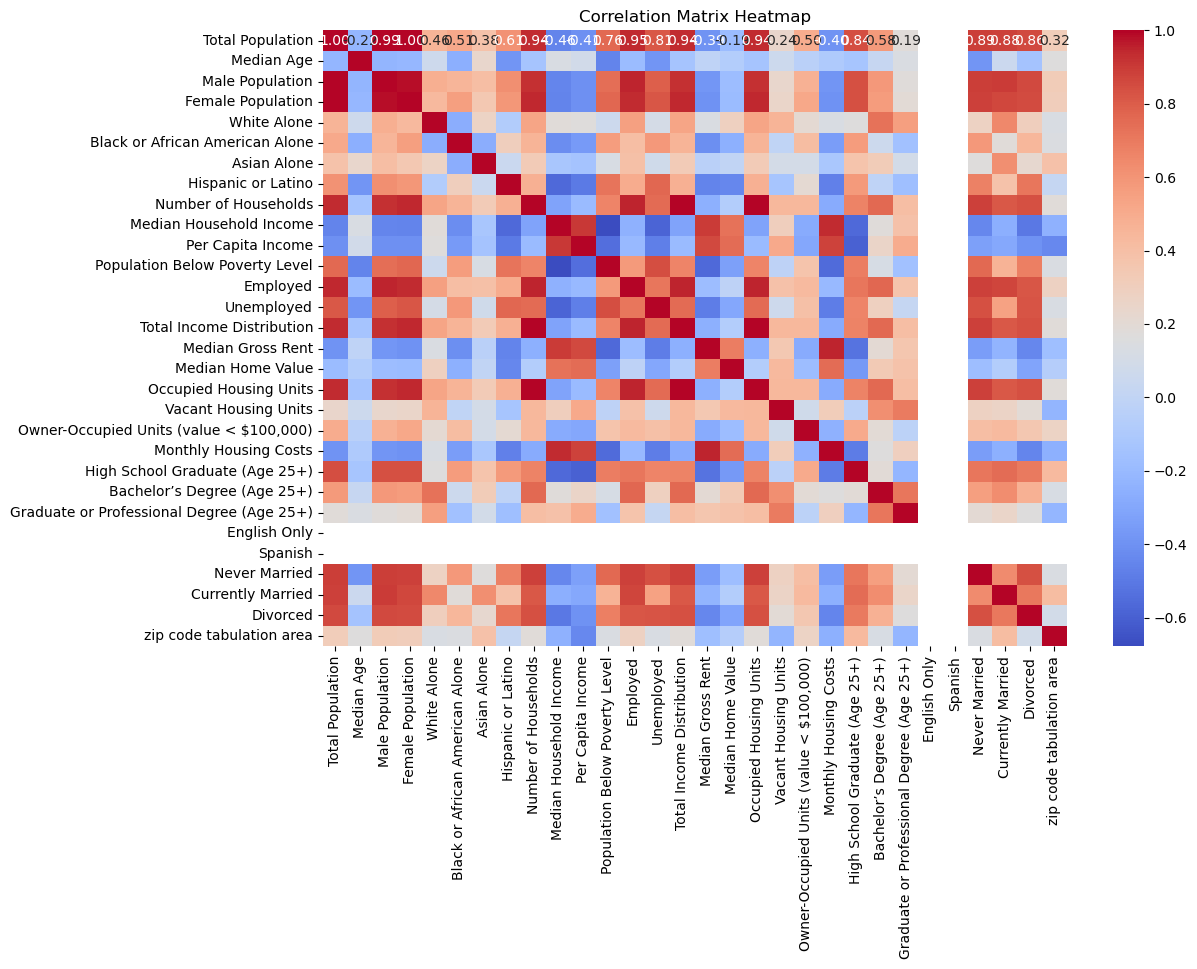

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = zip_code_df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

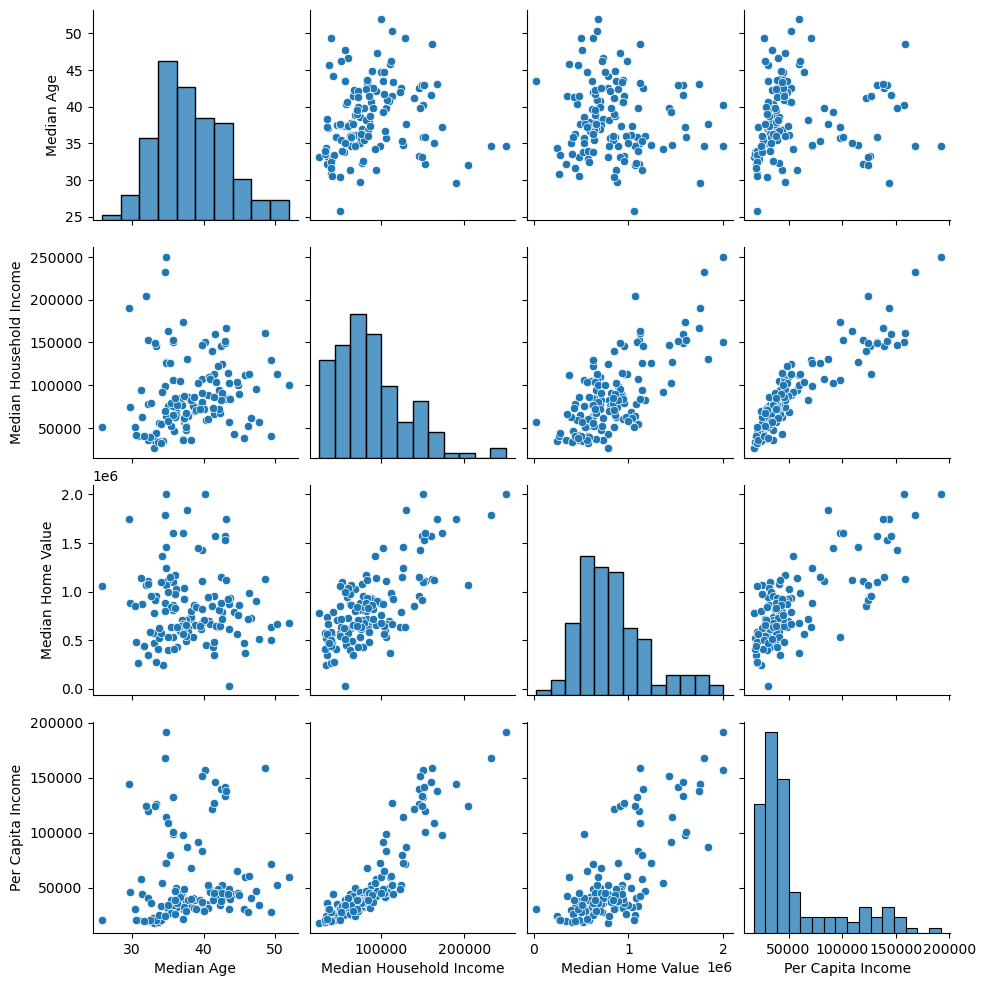

In [51]:
sns.pairplot(zip_code_df_cleaned[['Median Age', 'Median Household Income', 'Median Home Value', 'Per Capita Income']])
plt.show()



In [35]:
# from sklearn.preprocessing import StandardScaler

# numerical_columns = zip_code_df_cleaned.select_dtypes(include=[np.number]).columns
# scaler = StandardScaler()

# zip_code_df_cleaned[numerical_columns] = scaler.fit_transform(zip_code_df_cleaned[numerical_columns])
# print(zip_code_df_cleaned.head())


   Total Population  Median Age  Male Population  Female Population  \
0         -1.008662   -0.537145        -1.034622          -0.975540   
1          0.839791    1.208385         0.951554           0.729810   
2         -0.005441   -1.255893         0.021166          -0.029712   
3         -1.845830   -0.763037        -1.836810          -1.836891   
4         -1.688214   -1.789820        -1.720589          -1.642904   

   White Alone  Black or African American Alone  Asian Alone  \
0    -0.362156                        -0.587776    -0.259326   
1     0.204488                        -0.316514     2.225567   
2     1.039794                        -0.554465     0.161731   
3    -1.211491                        -0.715691    -0.640303   
4    -0.973478                        -0.706200    -0.686079   

   Hispanic or Latino  Number of Households  Median Household Income  ...  \
0           -0.708981             -0.661515                 0.428719  ...   
1            0.210511             

/var/folders/v5/xm8593vd6j9b4glbzfdh4pmw0000gn/T/ipykernel_19256/3372611295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_code_df_cleaned[numerical_columns] = scaler.fit_transform(zip_code_df_cleaned[numerical_columns])


# ZILLOW

In [79]:
all_listings = []

# Load each JSON file and combine listings into a list
for file in glob.glob('Scaper/scraped_data/*.json'):
    with open(file) as f:
        data = json.load(f)
        all_listings.extend(data['listResults'])
zillow_df = pd.DataFrame(all_listings)
zillow_df.to_csv('zillow.csv', index=False)

In [80]:
zillow_df.head()

,zpid,id,rawHomeStatusCd,marketingStatusSimplifiedCd,providerListingId,imgSrc,hasImage,detailUrl,statusType,statusText,...,canSaveBuilding,availabilityCount,isInstantTourEnabled,isContactable,hasOpenHouse,openHouseStartDate,openHouseEndDate,openHouseDescription,streetViewURL,streetViewMetadataURL
0,345131975,345131975,ForRent,For Rent,5eqtcyy0n70se,https://photos.zillowstatic.com/fp/5eeb8afc0be...,True,https://www.zillow.com/apartments/getzville-ny...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2079034973,2079034973,ForRent,For Rent,2hh680bv1mawm,https://photos.zillowstatic.com/fp/2736ccef5ac...,True,https://www.zillow.com/apartments/getzville-ny...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2060404202,2060404202,ForRent,For Rent,kt7f87gmwmr6,https://photos.zillowstatic.com/fp/3b90cdde69c...,True,https://www.zillow.com/homedetails/212-Sunshin...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30237104,30237104,ForRent,For Rent,4d75cvthfdwg,https://photos.zillowstatic.com/fp/0b1868fd4e4...,True,https://www.zillow.com/homedetails/88-Brittany...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30242470,30242470,ForRent,For Rent,1z1xx7aq58jwr,https://photos.zillowstatic.com/fp/8ce5bc9eca2...,True,https://www.zillow.com/homedetails/270-Heim-Rd...,FOR_RENT,House for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
zillow_df.columns

Index(['zpid', 'id', 'rawHomeStatusCd', 'marketingStatusSimplifiedCd',
       'providerListingId', 'imgSrc', 'hasImage', 'detailUrl', 'statusType',
       'statusText', 'countryCurrency', 'price', 'unformattedPrice', 'address',
       'addressStreet', 'addressCity', 'addressState', 'addressZipcode',
       'isUndisclosedAddress', 'beds', 'baths', 'area', 'latLong',
       'isZillowOwned', 'variableData', 'hdpData', 'isSaved',
       'isUserClaimingOwner', 'isUserConfirmedClaim', 'pgapt', 'sgapt',
       'shouldShowZestimateAsPrice', 'has3DModel', 'hasVideo', 'isHomeRec',
       'hasAdditionalAttributions', 'isFeaturedListing', 'isShowcaseListing',
       'list', 'relaxed', 'brokerName', 'carouselPhotos',
       'marketingTreatments', 'rooms', 'badgeInfo', 'availabilityDate',
       'zestimate', 'units', 'lotId', 'buildingName', 'isBuilding',
       'canSaveBuilding', 'availabilityCount', 'isInstantTourEnabled',
       'isContactable', 'hasOpenHouse', 'openHouseStartDate',
       'openH

In [82]:
# Drop rows where the 'price' column has empty values
zillow_df_cleaned = zillow_df.dropna(subset=['price'])

# Verify if rows with empty 'price' are removed
print(f"Shape after removing rows with empty price: {zillow_df_cleaned.shape}")
print(zillow_df_cleaned['price'].isnull().sum())  # This should return 0

Shape after removing rows with empty price: (5186, 61)
0


In [83]:
conversion_rate_cad_usd = 0.72
zillow_df['price'] = (
    zillow_df['price']
    .str.replace(r'[^0-9]', '', regex=True)  
    .astype(float)  
)

zillow_df.loc[zillow_df['countryCurrency'] == 'C$', 'price'] *= conversion_rate_cad_usd
zillow_df = zillow_df[zillow_df['addressState'] == 'NY']
print(zillow_df['price'].head())

0    1750.0
1    2075.0
2    2100.0
3    1500.0
4    2900.0
Name: price, dtype: float64


In [84]:
zillow_df.drop(columns=['zpid', 'rawHomeStatusCd', 'marketingStatusSimplifiedCd', 'id', 'providerListingId', 'imgSrc', 'hasImage', 'detailUrl', 'statusType', 'statusText', 'countryCurrency', 'unformattedPrice', 'address',
       'addressStreet', 'addressCity', 'addressState',
       'isUndisclosedAddress',
       'isZillowOwned', 'variableData', 'hdpData', 'has3DModel', 'hasVideo',
       'isSaved', 'isUserClaimingOwner', 'isUserConfirmedClaim', 'pgapt', 'sgapt', 'shouldShowZestimateAsPrice',
       'isHomeRec',
       'isShowcaseListing', 'list', 'relaxed', 'brokerName', 'carouselPhotos',
       'marketingTreatments', 'rooms', 'badgeInfo',
       'units', 'lotId', 'buildingName', 'isBuilding',
       'canSaveBuilding', 'availabilityCount', 'isInstantTourEnabled',
       'isContactable', 'hasOpenHouse', 'openHouseStartDate',
       'openHouseEndDate', 'openHouseDescription', 'streetViewURL',
       'streetViewMetadataURL'], inplace=True)

In [85]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6707 entries, 0 to 6717
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      5177 non-null   float64
 1   addressZipcode             6703 non-null   object 
 2   beds                       5177 non-null   float64
 3   baths                      5177 non-null   float64
 4   area                       3048 non-null   float64
 5   latLong                    6707 non-null   object 
 6   hasAdditionalAttributions  5177 non-null   object 
 7   isFeaturedListing          6707 non-null   bool   
 8   availabilityDate           3034 non-null   object 
 9   zestimate                  2017 non-null   float64
dtypes: bool(1), float64(5), object(4)
memory usage: 530.5+ KB


Total null values:
 price                        1530
addressZipcode                  4
beds                         1530
baths                        1530
area                         3659
latLong                         0
hasAdditionalAttributions    1530
isFeaturedListing               0
availabilityDate             3673
zestimate                    4690
dtype: int64

Exploring column: price
price
NaN         1530
2500.0       141
3000.0       124
2000.0       114
3500.0       107
            ... 
250000.0       1
110000.0       1
3699.0         1
8900.0         1
2913.0         1
Name: count, Length: 600, dtype: int64


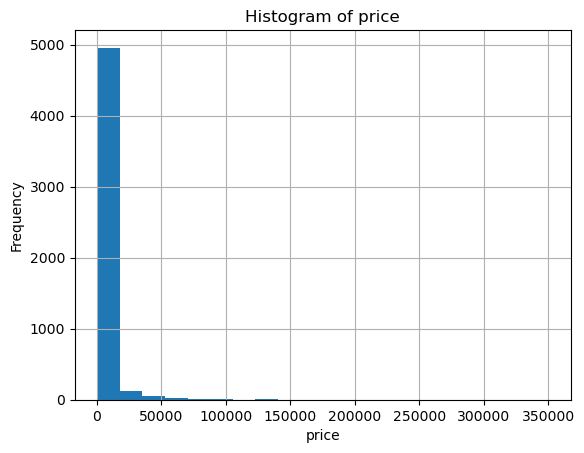


Exploring column: addressZipcode
addressZipcode
10021    70
10036    65
10032    62
10016    60
10025    60
         ..
13332     1
11109     1
11778     1
11104     1
14505     1
Name: count, Length: 652, dtype: int64
Skipping histogram for non-numeric column: addressZipcode

Exploring column: beds
beds
2.0     1543
NaN     1530
3.0     1428
1.0     1184
4.0      486
0.0      319
5.0      142
6.0       50
8.0       13
7.0        9
9.0        2
11.0       1
Name: count, dtype: int64


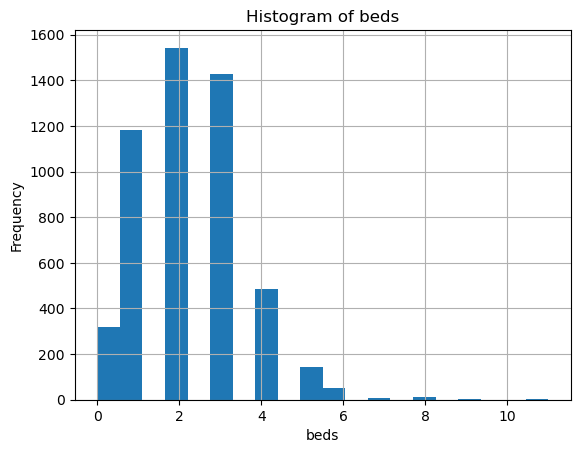


Exploring column: baths
baths
1.0     3299
NaN     1530
2.0     1156
3.0      451
4.0      155
5.0       56
6.0       26
7.0       11
0.0        8
9.0        5
10.0       4
16.0       2
8.0        2
15.0       1
12.0       1
Name: count, dtype: int64


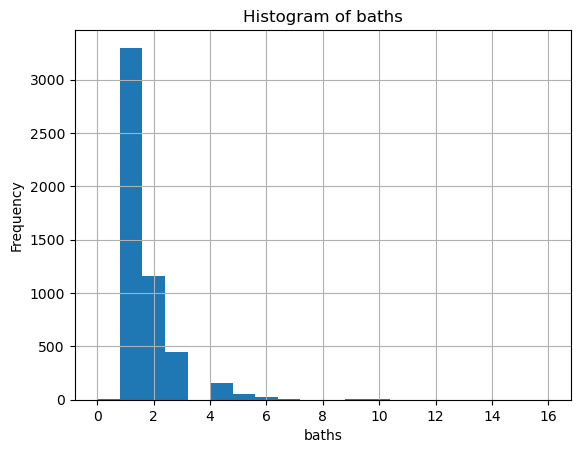


Exploring column: area
area
NaN       3659
1000.0     202
1200.0     171
1100.0     117
900.0      114
          ... 
3788.0       1
632.0        1
1764.0       1
2060.0       1
1182.0       1
Name: count, Length: 749, dtype: int64


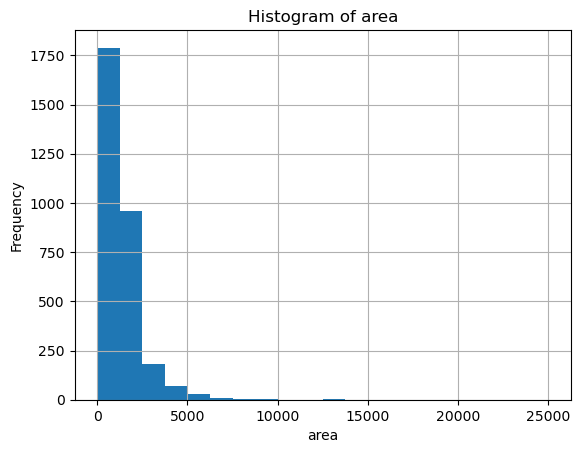


Exploring column: latLong
latLong
{}                                                  650
{'latitude': 40.77044, 'longitude': -73.95657}        5
{'latitude': 40.754528, 'longitude': -73.99754}       4
{'latitude': 40.759743, 'longitude': -73.959435}      4
{'latitude': 40.804535, 'longitude': -73.9607}        4
                                                   ... 
{'latitude': 40.667824, 'longitude': -73.99352}       1
{'latitude': 40.668938, 'longitude': -73.97473}       1
{'latitude': 43.197716, 'longitude': -77.65013}       1
{'latitude': 43.17368, 'longitude': -77.65828}        1
{'latitude': 43.136692, 'longitude': -77.19601}       1
Name: count, Length: 4684, dtype: int64
Skipping histogram for non-numeric column: latLong

Exploring column: hasAdditionalAttributions
hasAdditionalAttributions
True     3655
NaN      1530
False    1522
Name: count, dtype: int64
Skipping histogram for non-numeric column: hasAdditionalAttributions

Exploring column: isFeaturedListing
isFeaturedLis

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

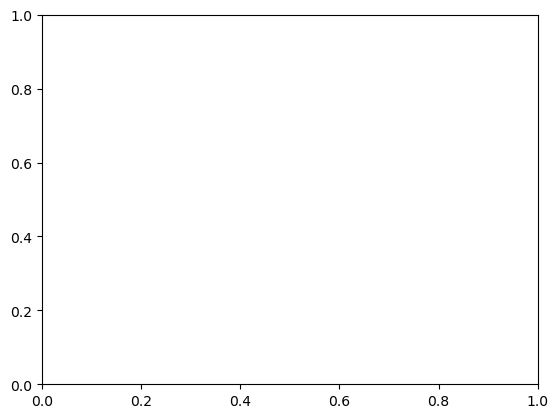

In [86]:
print('Total null values:\n', zillow_df.isnull().sum())

# Loop through columns to analyze
for column in zillow_df.columns:
    print(f"\nExploring column: {column}")
    print(zillow_df[column].value_counts(dropna=False))

    # Check if column is numeric before plotting
    if pd.api.types.is_numeric_dtype(zillow_df[column]):
        plt.figure()
        zillow_df[column].hist(bins=20)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Skipping histogram for non-numeric column: {column}")


In [88]:
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5177.0,5059.356384,1.338364e+04,300.0,1800.0,2650.0,3800.0,350000.0
beds,5177.0,2.260769,1.276191e+00,0.0,1.0,2.0,3.0,11.0
baths,5177.0,1.594939,1.075007e+00,0.0,1.0,1.0,2.0,16.0
area,3048.0,1470.806759,1.121114e+03,10.0,875.0,1179.0,1718.5,25000.0
zestimate,2017.0,931207.139316,1.180602e+06,15100.0,306600.0,649800.0,1048200.0,13328600.0


In [89]:
zillow_df.columns

Index(['price', 'addressZipcode', 'beds', 'baths', 'area', 'latLong',
       'hasAdditionalAttributions', 'isFeaturedListing', 'availabilityDate',
       'zestimate'],
      dtype='object')

In [90]:
# Convert both columns to string type
zillow_df['addressZipcode'] = zillow_df['addressZipcode'].astype(str)
zip_code_df['zip code tabulation area'] = zip_code_df['zip code tabulation area'].astype(str)

# Now merge
df = pd.merge(zillow_df, zip_code_df, 
              left_on='addressZipcode', 
              right_on='zip code tabulation area',
              how='left')

In [91]:
df.columns

Index(['price', 'addressZipcode', 'beds', 'baths', 'area', 'latLong',
       'hasAdditionalAttributions', 'isFeaturedListing', 'availabilityDate',
       'zestimate', 'Total Population', 'Median Age', 'Male Population',
       'Female Population', 'White Alone', 'Black or African American Alone',
       'Asian Alone', 'Hispanic or Latino', 'Number of Households',
       'Median Household Income', 'Per Capita Income',
       'Population Below Poverty Level', 'Employed', 'Unemployed',
       'Total Income Distribution', 'Median Gross Rent', 'Median Home Value',
       'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'High School Graduate (Age 25+)', 'Bachelor’s Degree (Age 25+)',
       'Graduate or Professional Degree (Age 25+)', 'English Only', 'Spanish',
       'Never Married', 'Currently Married', 'Divorced',
       'zip code tabulation area'],
      dtype='object')

In [92]:
# Clean and preprocess the data
def clean_price(price_str):
    if isinstance(price_str, str):
        # Remove '$', '/', 'mo', and ',','+','C' characters and convert to float
        return float(price_str.replace('$', '').replace('/mo', '').replace(',', '').replace('+', '').replace('C',''))
    return price_str


In [93]:
# Clean price columns
df['price'] = df['price'].apply(clean_price)
df['Monthly Housing Costs'] = df['Monthly Housing Costs'].apply(clean_price)
df['Median Home Value'] = df['Median Home Value'].apply(clean_price)

In [121]:
bins = list(range(0, 10000, 1000)) + [float('inf')]  # Bins from 0 to 10,000, step 500, and one bin for values above 10,000
labels = [f"${i}-{i+999}" for i in range(0, 9000, 1000)] + ["$10,000+"]

# Apply the categorization
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Check the result
print(df[['price', 'price_category']].head())

    price price_category
0  1750.0     $1000-1999
1  2075.0     $2000-2999
2  2100.0     $2000-2999
3  1500.0     $1000-1999
4  2900.0     $2000-2999


## EDA

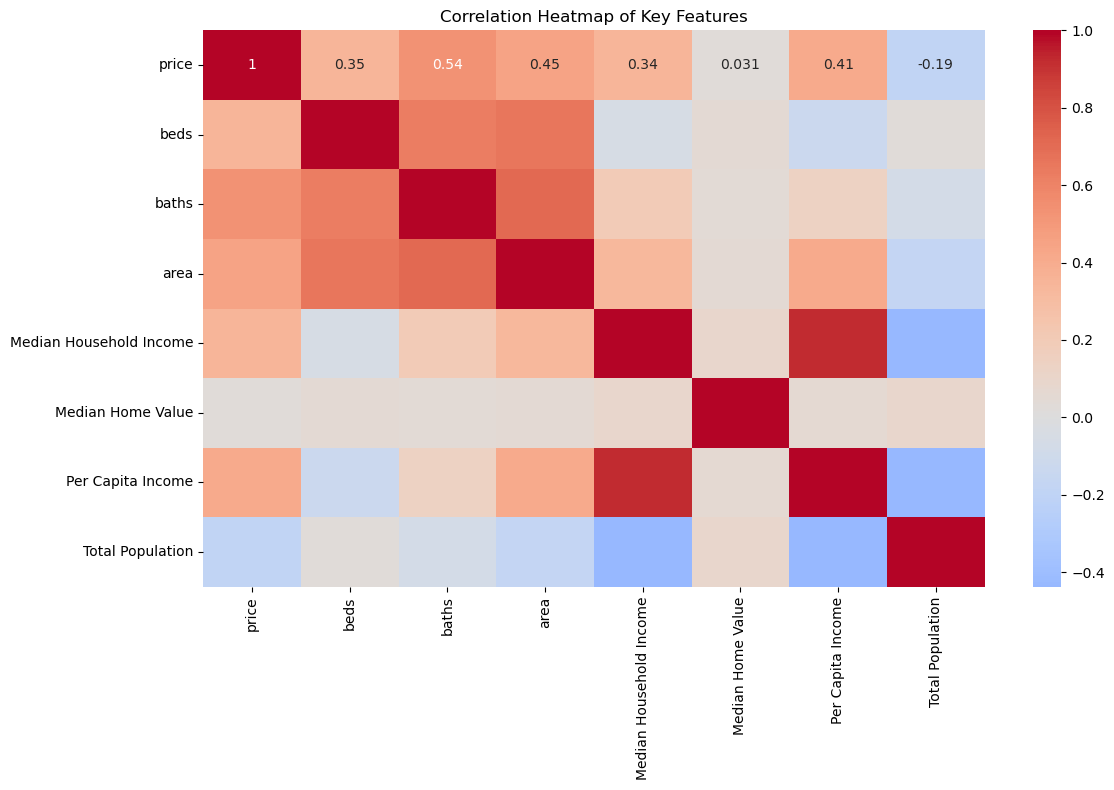

In [94]:
# 1. Correlation Heatmap for Key Features
features = ['price', 'beds', 'baths', 'area', 'Median Household Income', 
           'Median Home Value', 'Per Capita Income', 'Total Population']
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


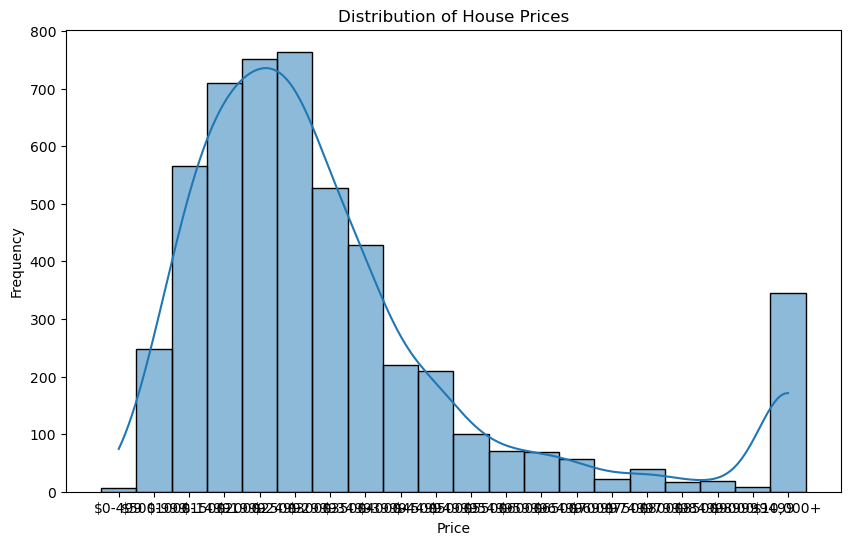

In [110]:
# most houses look to be lower than $50000
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_category', bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


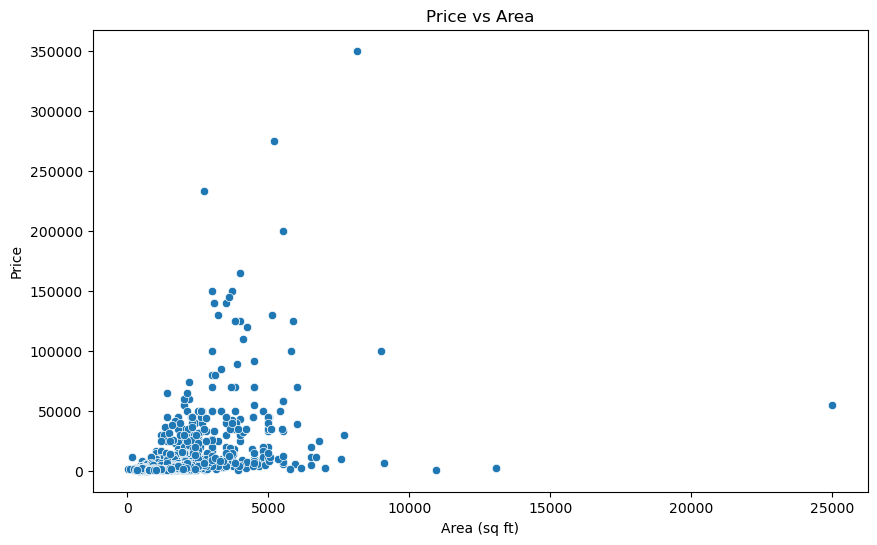

In [112]:
# Price vs Area scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


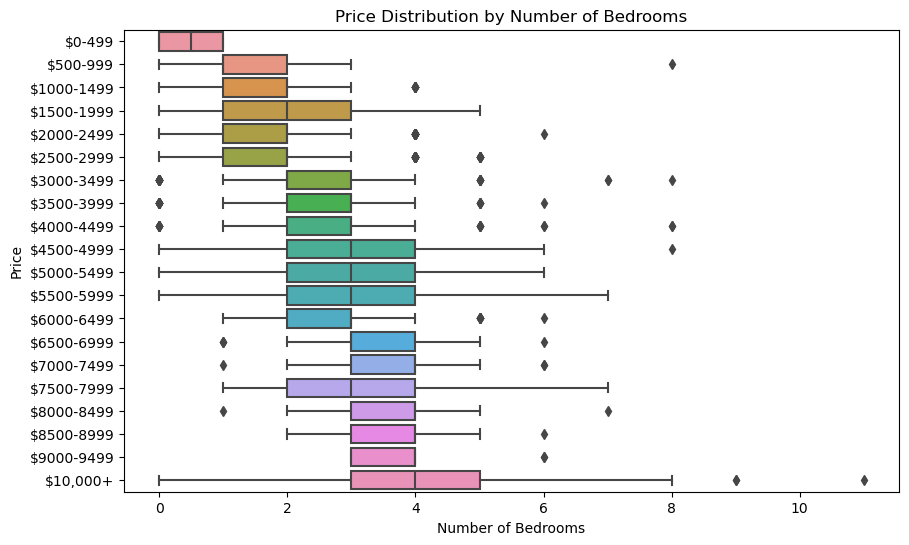

In [113]:
# Box plot of prices by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='beds', y='price_category')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

## Train a simple model

In [99]:
df['price'].isnull().value_counts()
# 1532 null values

price
False    5177
Name: count, dtype: int64

    price price_category
0  1750.0     $1500-1999
1  2075.0     $2000-2499
2  2100.0     $2000-2499
3  1500.0     $1500-1999
4  2900.0     $2500-2999


In [115]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# Prepare features with log transformation for price
features = ['beds', 'baths', 'area', 'Median Household Income', 
           'Per Capita Income', 'Median Home Value', 'Total Population']
df = df[df['price'].isnull()==False]
X = df[features]
y = df['price']

# Log transform the target variable
pt = PowerTransformer(method='yeo-johnson')
y_transformed = pt.fit_transform(y.values.reshape(-1, 1)).ravel()

# Handle missing values
X = X.fillna(X.median())

# Use RobustScaler instead of StandardScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Transform predictions back to original scale
lr_pred = pt.inverse_transform(lr_model.predict(X_test).reshape(-1, 1)).ravel()
lr_pred[np.isnan(lr_pred)] = np.median(lr_pred[~np.isnan(lr_pred)])

rf_pred = pt.inverse_transform(rf_model.predict(X_test).reshape(-1, 1)).ravel()
y_test_original = pt.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Calculate metrics
lr_rmse = mean_squared_error(y_test_original, lr_pred, squared=False)
rf_rmse = mean_squared_error(y_test_original, rf_pred, squared=False)

print(f'Linear Regression RMSE: ${lr_rmse:,.2f}')
print(f'Random Forest RMSE: ${rf_rmse:,.2f}')

Linear Regression RMSE: $9,574.45
Random Forest RMSE: $8,754.35


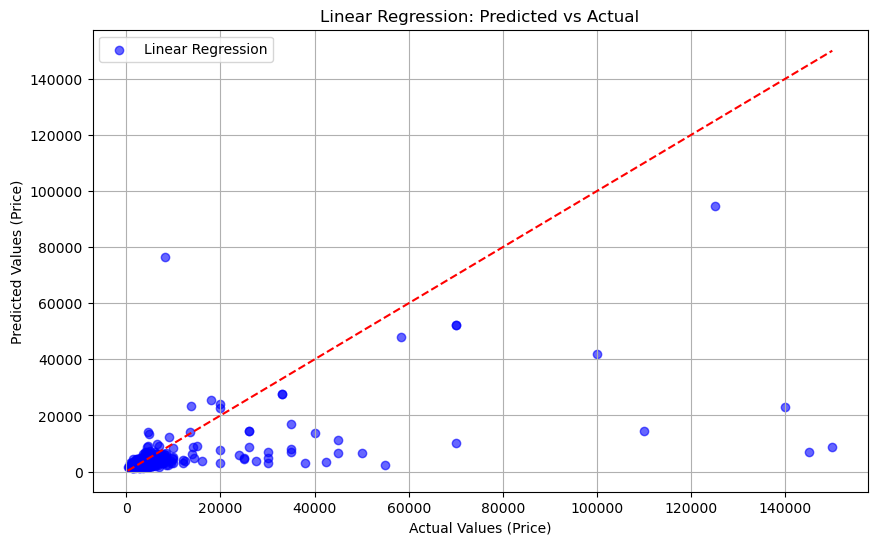

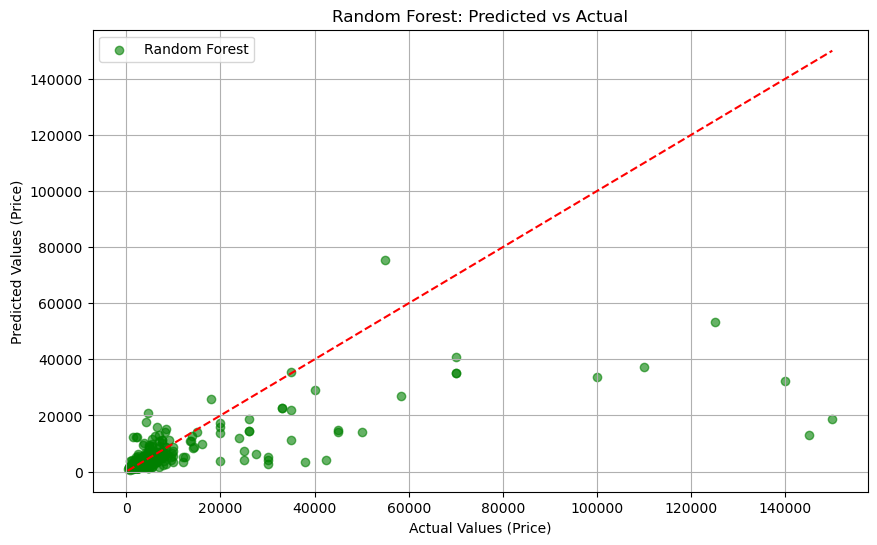

In [106]:
import matplotlib.pyplot as plt

# Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, lr_pred, color='blue', label='Linear Regression', alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', linestyle='--')
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Values (Price)")
plt.ylabel("Predicted Values (Price)")
plt.legend()
plt.grid(True)
plt.show()

# Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, rf_pred, color='green', label='Random Forest', alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', linestyle='--')
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Values (Price)")
plt.ylabel("Predicted Values (Price)")
plt.legend()
plt.grid(True)
plt.show()


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prepare features and target
features = ['beds', 'baths', 'area', 'Median Household Income', 
           'Per Capita Income', 'Median Home Value', 'Total Population']
X = df[features]
y = df['price_category']

# Handle missing values in features
X = X.fillna(X.median())

# Scale the features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models (Logistic Regression and Random Forest Classifier)
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate models
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Evaluation:
Accuracy: 0.3127
Classification Report:
              precision    recall  f1-score   support

      $0-999       0.00      0.00      0.00        43
    $10,000+       0.16      0.85      0.27        55
  $1000-1999       0.47      0.42      0.44       270
  $2000-2999       0.36      0.50      0.42       284
  $3000-3999       0.38      0.10      0.16       201
  $4000-4999       0.11      0.02      0.03       102
  $5000-5999       0.00      0.00      0.00        34
  $6000-6999       0.00      0.00      0.00        20
  $7000-7999       0.00      0.00      0.00        18
  $8000-8999       0.00      0.00      0.00         9

    accuracy                           0.31      1036
   macro avg       0.15      0.19      0.13      1036
weighted avg       0.31      0.31      0.28      1036

Confusion Matrix:
[[  0   1  25  17   0   0   0   0   0   0]
 [  0  47   0   3   3   2   0   0   0   0]
 [  3  45 114 104   0   3   0   1   0   0]
 [  8  45  69 141  10 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
from sklearn.metrics import accuracy_score

# Get the most frequent category (mode) in the training data
base_rate = y_train.mode()[0]

# Predict this base rate for all instances in the test set
base_rate_predictions = [base_rate] * len(y_test)

# Evaluate the accuracy of the base rate model
base_rate_accuracy = accuracy_score(y_test, base_rate_predictions)

print(f"Base Rate Accuracy: {base_rate_accuracy:.4f}")


Base Rate Accuracy: 0.2741
